In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt 
from scipy import stats

In [217]:
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [9]:
pd.set_option("display.max_columns",1000)

It's the time to try to know how would had looked Syria without the conflict. As seen in the first notebook thanks the correlations, one of the best indicators of the development of a country is the CO2 emissions. We saw in one of the plots how decreased after 2007.

In [212]:
df_bolivia = pd.read_csv('C:/Users/Usuario/Desktop/TFM/bolivia_clean.csv', index_col=0)
df_morocco = pd.read_csv('C:/Users/Usuario/Desktop/TFM/morocco_clean.csv', index_col=0)
df_syria = pd.read_csv('C:/Users/Usuario/Desktop/TFM/syria_clean.csv', index_col=0)

In [4]:
df_bolivia_subset = df_bolivia.dropna(subset=["Population_total", "CO2_emissions_(kt)"])

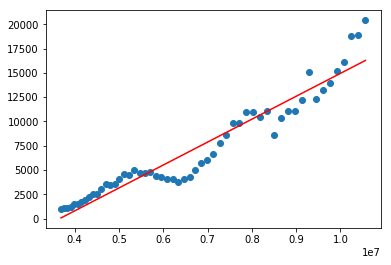

In [7]:
x = df_bolivia_subset["Population_total"]
y = df_bolivia_subset["CO2_emissions_(kt)"]

plt.scatter(x, y)

plt.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),
         color='red')
plt.show()

Lack of the data in some indicators, not also in Syria but in Bolivia and Morocco forces us to estimate this data in order to get more accuracy. We have got no CO2 emissions since 2015 in Bolivia and Morocco.

## Bolivia

In [154]:
df_bolivia.tail(5)

,Air_transport_passengers_carried,Armed_forces_personnel_total,CO2_emissions_(kt),Exports_of_goods_and_services_(current_US),External_debt_stocks_total_(DOD_current_US),Fixed_broadband_subscriptions,GDP_(current_US),GNI_Atlas_method_(current_US),Hospital_beds_(per_1000_people),Imports_of_goods_and_services_(current_US),Labor_force_total,Life_expectancy_at_birth_total_(years),Military_expenditure_(current_LCU),Mobile_cellular_subscriptions,Physicians_(per_1000_people),Population_ages_0_14_total,Population_ages_15_64_total,Population_ages_65_and_above_total,Population_total,Railways_passengers_carried_(million_passenger_km),Rural_population,Urban_population,Year
2013,2.027888e+06,83200.0,18918.053,1.351846e+10,8.201283e+09,154098.0,3.065934e+10,2.725505e+10,NaN,1.138640e+10,4803674.0,67.922,3.900072e+09,10425704.0,NaN,3469056.0,6282974.0,648234.0,10400264.0,NaN,3359389.0,7040875.0,2013
2014,3.563044e+06,71200.0,20410.522,1.428507e+10,8.917172e+09,172783.0,3.299619e+10,3.035250e+10,NaN,1.384896e+10,5052899.0,68.357,4.324866e+09,10450341.0,NaN,3474251.0,6418360.0,669548.0,10562159.0,NaN,3374927.0,7187232.0,2014
2015,4.115271e+06,71200.0,NaN,1.018660e+10,9.913846e+09,180951.0,3.300020e+10,3.220842e+10,NaN,1.223137e+10,4857588.0,68.756,3.976500e+09,10162829.0,NaN,3479656.0,6551647.0,693402.0,10724705.0,NaN,3389758.0,7334947.0,2015
2016,3.678739e+06,71200.0,NaN,8.311505e+09,1.101531e+10,287589.0,3.394113e+10,3.349050e+10,NaN,1.083164e+10,4984659.0,69.125,3.818043e+09,10106216.0,NaN,3487635.0,6683948.0,716299.0,10887882.0,NaN,3403770.0,7484112.0,2016
2017,3.302463e+06,NaN,NaN,9.341206e+09,NaN,358680.0,3.750864e+10,3.456886e+10,NaN,1.192794e+10,5093219.0,69.100,4.555274e+09,10963224.0,NaN,3496689.0,6814033.0,740878.0,11051600.0,NaN,3417155.0,7634445.0,2017


We are going to use a Linear Regression to get to know that data. Let's use the population of Bolivia to try to predict that data. 

We will build the model and first check it with data we already know, the emissions in 2014

In [89]:
BOL_CO2_2014 = df_bolivia.at[2014,"CO2_emissions_(kt)"]
print(BOL_CO2_2014)

20410.522


In [364]:
df_bolivia['const'] = 1

In [441]:
reg_bol = sm.OLS(endog=df_bolivia['CO2_emissions_(kt)'], exog=df_bolivia[['const', 'Population_total', "Year"]], missing='drop')
type(reg_bol)

statsmodels.regression.linear_model.OLS

In [109]:
results_bol = reg_bol.fit()
type(results_bol)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [110]:
results_bol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     CO2_emissions_(kt)   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     481.6
Date:                Sat, 17 Nov 2018   Prob (F-statistic):           1.02e-34
Time:                        22:22:52   Log-Likelihood:                -476.32
No. Observations:                  56   AIC:                             958.6
Df Residuals:                      53   BIC:                             964.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9.264e+05   1.94e+05      4.775      0.000    5.37e+05    1.32e+06
Population_total     0.0061      0.001      7.905      0.000       0.005       0.008
Year              -483.0044    100.208     -4.820      0.000    -683.996    -282.013
==============================================================================
Omnibus:                        1.548   Durbin-Watson:                   0.609
Prob(Omnibus):                  0.461   Jarque-Bera (JB):                1.223
Skew:                           0.144   Prob(JB):                        0.542
Kurtosis:                       2.336   Cond. No.                     8.37e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.37e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Well, let's check how good predict the CO2 for 2014, that we saw above that is 20410.522.

In [151]:
results_bol.predict(exog=[1, df_bolivia.at[2014,"Population_total"], 2014])

array([17501.6599157])

In [103]:
first_acc = (results_bol.predict(exog=[1, df_bolivia.at[2014,"Population_total"], 2014]) - BOL_CO2_2014) / results_bol.predict(exog=[1, df_bolivia.at[2014,"Population_total"], 2014])
print('The accuracy of the regression is %.f' %(first_acc*100) + '%')

The accuracy of the regression is -17%


Mmm, not very accurate, a difference of 16,6%. Let's try again but this time adding another indicator to our regression model. Maybe bolivian GNP can help us to get more accurate values.

In [116]:
reg_bol_II = sm.OLS(endog=df_bolivia['CO2_emissions_(kt)'], exog=df_bolivia[['const', 'Population_total',"GDP_(current_US)", "Year"]], missing='drop')
results_bol_II = reg_bol_II.fit()

In [115]:
second_acc = (results_bol_II.predict(exog=[1, df_bolivia.at[2014,"Population_total"], df_bolivia.at[2014,"GDP_(current_US)"], 2014]) - BOL_CO2_2014) / results_bol_II.predict(exog=[1, df_bolivia.at[2014,"Population_total"],df_bolivia.at[2014,"GDP_(current_US)"], 2014])
print('The accuracy of the regression is %.f' %(second_acc*100) + '%')

The accuracy of the regression is -6%


Ok we accept a difference of 6%. Now we fill the cells without data and move forward to the land where to eat with the right hand is synonim of good manners. The left hand is considered *impure* as it is for intimate hygiene, Morocco         ***FUNNY FACTS***

In [189]:
BOL_CO2_2015 = results_bol_II.predict(exog=[1, df_bolivia.at[2015,"Population_total"], df_bolivia.at[2015,"GDP_(current_US)"], 
                                            2015])
BOL_CO2_2016 = results_bol_II.predict(exog=[1, df_bolivia.at[2016,"Population_total"], df_bolivia.at[2016,"GDP_(current_US)"], 
                                            2016])
BOL_CO2_2017 = results_bol_II.predict(exog=[1, df_bolivia.at[2017,"Population_total"], df_bolivia.at[2017,"GDP_(current_US)"], 
                                            2017])

In [ ]:
df_bolivia.at[2015,"CO2_emissions_(kt)"] = BOL_CO2_2015
df_bolivia.at[2016,"CO2_emissions_(kt)"] = BOL_CO2_2016
df_bolivia.at[2017,"CO2_emissions_(kt)"] = BOL_CO2_2017

In [190]:
df_bolivia.tail(5)

,Air_transport_passengers_carried,Armed_forces_personnel_total,CO2_emissions_(kt),Exports_of_goods_and_services_(current_US),External_debt_stocks_total_(DOD_current_US),Fixed_broadband_subscriptions,GDP_(current_US),GNI_Atlas_method_(current_US),Hospital_beds_(per_1000_people),Imports_of_goods_and_services_(current_US),Labor_force_total,Life_expectancy_at_birth_total_(years),Military_expenditure_(current_LCU),Mobile_cellular_subscriptions,Physicians_(per_1000_people),Population_ages_0_14_total,Population_ages_15_64_total,Population_ages_65_and_above_total,Population_total,Railways_passengers_carried_(million_passenger_km),Rural_population,Urban_population,Year
2013,2.027888e+06,83200.0,18918.053000,1.351846e+10,8.201283e+09,154098.0,3.065934e+10,2.725505e+10,NaN,1.138640e+10,4803674.0,67.922,3.900072e+09,10425704.0,NaN,3469056.0,6282974.0,648234.0,10400264.0,NaN,3359389.0,7040875.0,2013
2014,3.563044e+06,71200.0,20410.522000,1.428507e+10,8.917172e+09,172783.0,3.299619e+10,3.035250e+10,NaN,1.384896e+10,5052899.0,68.357,4.324866e+09,10450341.0,NaN,3474251.0,6418360.0,669548.0,10562159.0,NaN,3374927.0,7187232.0,2014
2015,4.115271e+06,71200.0,19639.260208,1.018660e+10,9.913846e+09,180951.0,3.300020e+10,3.220842e+10,NaN,1.223137e+10,4857588.0,68.756,3.976500e+09,10162829.0,NaN,3479656.0,6551647.0,693402.0,10724705.0,NaN,3389758.0,7334947.0,2015
2016,3.678739e+06,71200.0,20154.295091,8.311505e+09,1.101531e+10,287589.0,3.394113e+10,3.349050e+10,NaN,1.083164e+10,4984659.0,69.125,3.818043e+09,10106216.0,NaN,3487635.0,6683948.0,716299.0,10887882.0,NaN,3403770.0,7484112.0,2016
2017,3.302463e+06,NaN,21167.043209,9.341206e+09,NaN,358680.0,3.750864e+10,3.456886e+10,NaN,1.192794e+10,5093219.0,69.100,4.555274e+09,10963224.0,NaN,3496689.0,6814033.0,740878.0,11051600.0,NaN,3417155.0,7634445.0,2017


## Morocco

The same for our North African country

In [202]:
df_morocco.tail(5)

,Air_transport_passengers_carried,Armed_forces_personnel_total,CO2_emissions_(kt),Exports_of_goods_and_services_(current_US),External_debt_stocks_total_(DOD_current_US),Fixed_broadband_subscriptions,GDP_(current_US),GNI_Atlas_method_(current_US),Hospital_beds_(per_1000_people),Imports_of_goods_and_services_(current_US),Labor_force_total,Life_expectancy_at_birth_total_(years),Military_expenditure_(current_LCU),Mobile_cellular_subscriptions,Physicians_(per_1000_people),Population_ages_0_14_total,Population_ages_15_64_total,Population_ages_65_and_above_total,Population_total,Railways_passengers_carried_(million_passenger_km),Rural_population,Urban_population,Year,const
2013,6507408.0,245800.0,59082.704,3.501493e+10,3.926330e+10,843940.0,1.068256e+11,1.058164e+11,NaN,5.046755e+10,12003223.0,75.026,3.417300e+10,42423794.0,NaN,9438879.0,22284898.0,2100992.0,33824769.0,4819.0,13631382.0,20193387.0,2013,1
2014,6976810.0,245800.0,59863.775,3.772516e+10,4.280948e+10,993451.0,1.098814e+11,1.062497e+11,NaN,5.147330e+10,12198022.0,75.309,3.403400e+10,44114534.0,0.618,9541974.0,22622915.0,2153193.0,34318082.0,5449.0,13639379.0,20678703.0,2014,1
2015,7043971.0,245800.0,NaN,3.449771e+10,4.299039e+10,1147533.0,1.005933e+11,1.066936e+11,NaN,4.233463e+10,12357082.0,75.573,3.191230e+10,43079696.0,NaN,9626407.0,22950840.0,2226075.0,34803322.0,5507.0,13639770.0,21163552.0,2015,1
2016,7738637.0,245800.0,NaN,3.635575e+10,4.626466e+10,1255428.0,1.036063e+11,1.029377e+11,NaN,4.696538e+10,12541812.0,75.821,3.263180e+10,41513933.0,NaN,9726617.0,23237448.0,2312721.0,35276786.0,5208.0,13630950.0,21645836.0,2016,1
2017,8436970.0,NaN,NaN,4.013671e+10,NaN,1378867.0,1.091395e+11,1.039106e+11,NaN,5.094697e+10,12714484.0,NaN,3.384518e+10,43916066.0,NaN,9790066.0,23530251.0,2419263.0,35739580.0,NaN,13613921.0,22125659.0,2017,1


In [365]:
df_morocco['const'] = 1

In [193]:
reg_mor = sm.OLS(endog=df_morocco['CO2_emissions_(kt)'], exog=df_morocco[['const', 'Population_total', "GDP_(current_US)", "Year"]], missing='drop')

In [194]:
results_mor = reg_mor.fit()

In [195]:
results_mor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     CO2_emissions_(kt)   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2414.
Date:                Sun, 18 Nov 2018   Prob (F-statistic):           6.31e-55
Time:                        10:51:50   Log-Likelihood:                -478.88
No. Observations:                  55   AIC:                             965.8
Df Residuals:                      51   BIC:                             973.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -1.36e+06   6.06e+05     -2.245      0.029   -2.58e+06   -1.44e+05
Population_total    -0.0004      0.001     -0.609      0.545      -0.002       0.001
GDP_(current_US)  3.062e-07   1.82e-08     16.871      0.000     2.7e-07    3.43e-07
Year               696.7772    313.325      2.224      0.031      67.751    1325.803
==============================================================================
Omnibus:                       13.193   Durbin-Watson:                   1.386
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.266
Skew:                           1.034   Prob(JB):                     0.000798
Kurtosis:                       4.397   Cond. No.                     1.35e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [196]:
MOR_CO2_2014 = df_morocco.at[2014,"CO2_emissions_(kt)"]
print(MOR_CO2_2014)

59863.775


In [201]:
acc_mor = (results_mor.predict(exog=[1, df_morocco.at[2014,"Population_total"], df_morocco.at[2014,"GDP_(current_US)"], 2014]) - MOR_CO2_2014) / results_mor.predict(exog=[1, df_morocco.at[2014,"Population_total"],df_morocco.at[2014,"GDP_(current_US)"], 2014])
print('The accuracy of the regression is %.f' %(acc_mor*100) + '%')

The accuracy of the regression is 4%


In [302]:
MOR_CO2_2015 = results_mor.predict(exog=[1, df_morocco.at[2015,"Population_total"], df_morocco.at[2015,"GDP_(current_US)"], 
                                            2015])
MOR_CO2_2016 = results_mor.predict(exog=[1, df_morocco.at[2016,"Population_total"], df_morocco.at[2016,"GDP_(current_US)"], 
                                            2016])
MOR_CO2_2017 = results_mor.predict(exog=[1, df_morocco.at[2017,"Population_total"], df_morocco.at[2017,"GDP_(current_US)"], 
                                            2017])

In [303]:
df_morocco.at[2015,"CO2_emissions_(kt)"] = MOR_CO2_2015
df_morocco.at[2016,"CO2_emissions_(kt)"] = MOR_CO2_2016
df_morocco.at[2017,"CO2_emissions_(kt)"] = MOR_CO2_2017

In [215]:
df_morocco.tail(5)

,Air_transport_passengers_carried,Armed_forces_personnel_total,CO2_emissions_(kt),Exports_of_goods_and_services_(current_US),External_debt_stocks_total_(DOD_current_US),Fixed_broadband_subscriptions,GDP_(current_US),GNI_Atlas_method_(current_US),Hospital_beds_(per_1000_people),Imports_of_goods_and_services_(current_US),Labor_force_total,Life_expectancy_at_birth_total_(years),Military_expenditure_(current_LCU),Mobile_cellular_subscriptions,Physicians_(per_1000_people),Population_ages_0_14_total,Population_ages_15_64_total,Population_ages_65_and_above_total,Population_total,Railways_passengers_carried_(million_passenger_km),Rural_population,Urban_population,Year
2013,6507408.0,245800.0,59082.704000,3.501493e+10,3.926330e+10,843940.0,1.068256e+11,1.058164e+11,NaN,5.046755e+10,12003223.0,75.026,3.417300e+10,42423794.0,NaN,9438879.0,22284898.0,2100992.0,33824769.0,4819.0,13631382.0,20193387.0,2013
2014,6976810.0,245800.0,59863.775000,3.772516e+10,4.280948e+10,993451.0,1.098814e+11,1.062497e+11,NaN,5.147330e+10,12198022.0,75.309,3.403400e+10,44114534.0,0.618,9541974.0,22622915.0,2153193.0,34318082.0,5449.0,13639379.0,20678703.0,2014
2015,7043971.0,245800.0,113281.087799,3.449771e+10,4.299039e+10,1147533.0,1.005933e+11,1.066936e+11,NaN,4.233463e+10,12357082.0,75.573,3.191230e+10,43079696.0,NaN,9626407.0,22950840.0,2226075.0,34803322.0,5507.0,13639770.0,21163552.0,2015
2016,7738637.0,245800.0,115229.591658,3.635575e+10,4.626466e+10,1255428.0,1.036063e+11,1.029377e+11,NaN,4.696538e+10,12541812.0,75.821,3.263180e+10,41513933.0,NaN,9726617.0,23237448.0,2312721.0,35276786.0,5208.0,13630950.0,21645836.0,2016
2017,8436970.0,NaN,117618.050688,4.013671e+10,NaN,1378867.0,1.091395e+11,1.039106e+11,NaN,5.094697e+10,12714484.0,NaN,3.384518e+10,43916066.0,NaN,9790066.0,23530251.0,2419263.0,35739580.0,NaN,13613921.0,22125659.0,2017


## Syria

Using this method we can predict the Syrian GDP until 2014. We are going to add Urban population indicator to get more accuracy this time. As said previously, with the start of the war this indicator stopped showing data.

Let's hope that this method adjust to reality because Syrian GDP almost doubled itself from 2003 to 2007.

In [227]:
GNP_SYR_inc = (df_syria.at[2007,"GDP_(current_US)"] - df_syria.at[2003,"GDP_(current_US)"]) / df_syria.at[2003,"GDP_(current_US)"]
print('Increase of Syrian GNP between 2003 and 2007 was %.f' %(GNP_SYR_inc*100) + '%')

Increase of Syrian GNP between 2003 and 2007 was 85%


In [219]:
df_bolivia["Country"] = "BOL"
df_syria["Country"] = "SYR"
df_morocco["Country"] = "MAR"

In [359]:
df = pd.concat([df_bolivia, df_morocco, df_syria])

c:\users\usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


Our regression is not intelligent enough to know that in 2008 started a world financial crisis so we will compare the results using Morocco and Bolivia, that as it is to be seen in the plot stopped growing that fast after 2008, especially Morocco.

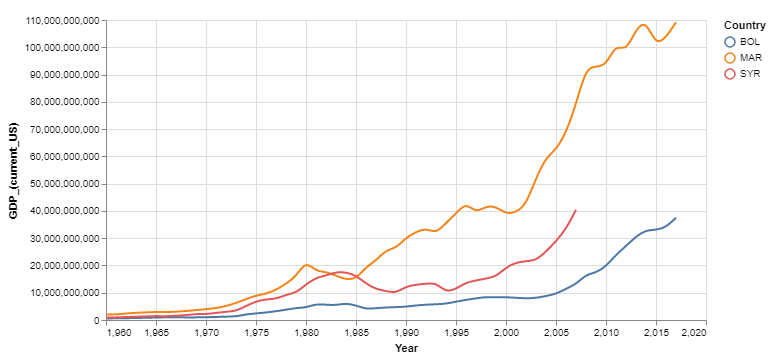

In [221]:
nearest = alt.selection(type='single', nearest=True, on='mouseover', fields=["Year"], empty='none')

line = alt.Chart().mark_line(interpolate='basis').encode(
    x="Year",
    y="GDP_(current_US)", 
    color="Country"
)

selectors = alt.Chart().mark_point().encode(x="Year", opacity=alt.value(0)).add_selection(nearest)

points = line.mark_point().encode(opacity=alt.condition(nearest, alt.value(1), alt.value(0)))

text = line.mark_text(align='left', dx=5, dy=-5).encode(text=alt.condition(nearest, "GDP_(current_US)", alt.value(' ')))


rules = alt.Chart().mark_rule(color='gray').encode(x="Year").transform_filter(nearest)


alt.layer(line, selectors, points, rules, text, data=df, width=600, height=300)

In [358]:
df_syria.tail(15)

,Air_transport_passengers_carried,Armed_forces_personnel_total,CO2_emissions_(kt),Exports_of_goods_and_services_(current_US),External_debt_stocks_total_(DOD_current_US),Fixed_broadband_subscriptions,GDP_(current_US),GNI_Atlas_method_(current_US),Hospital_beds_(per_1000_people),Imports_of_goods_and_services_(current_US),Labor_force_total,Life_expectancy_at_birth_total_(years),Military_expenditure_(current_LCU),Mobile_cellular_subscriptions,Physicians_(per_1000_people),Population_ages_0_14_total,Population_ages_15_64_total,Population_ages_65_and_above_total,Population_total,Railways_passengers_carried_(million_passenger_km),Rural_population,Urban_population,Year,Country,const
2003,9.078500e+05,427000.0,54275.267000,7.305995e+09,0.000000e+00,NaN,2.182814e+10,2.152621e+10,1.50,6.235989e+09,5137966.0,73.967,6.711700e+10,1185000.0,1.414,6938174.0,9894697.0,582395.0,17415266.0,528.0,8176642.0,9238624.0,2003,SYR,1
2004,1.169646e+06,415000.0,51103.312000,1.004842e+10,0.000000e+00,600.0,2.508693e+10,2.453095e+10,1.30,9.987584e+09,5158202.0,74.250,7.020900e+10,2346000.0,1.465,7019483.0,10190304.0,596851.0,17806638.0,635.0,8294866.0,9511772.0,2004,SYR,1
2005,1.239825e+06,416000.0,50626.602000,1.165552e+10,0.000000e+00,2700.0,2.885897e+10,2.765320e+10,NaN,1.201245e+10,5196070.0,74.430,7.572000e+10,2950000.0,1.558,7154765.0,10523980.0,615866.0,18294611.0,607.0,8455403.0,9839208.0,2005,SYR,1
2006,1.252102e+06,401000.0,53582.204000,1.316800e+10,0.000000e+00,5218.0,3.333284e+10,3.095353e+10,1.40,1.290758e+10,5309963.0,74.412,7.492400e+10,4675000.0,0.530,7272364.0,11002425.0,640188.0,18914977.0,571.2,8673274.0,10241703.0,2006,SYR,1
2007,1.371450e+06,401000.0,66468.042000,1.561389e+10,0.000000e+00,6957.0,3.421129e+10,3.617600e+10,1.47,1.528644e+10,5428457.0,74.152,8.274200e+10,6234682.0,1.523,7449359.0,11515508.0,667939.0,19632806.0,744.2,8930767.0,10702039.0,2007,SYR,1
2008,1.358473e+06,401000.0,67681.819000,NaN,5.385427e+09,11055.0,3.595912e+10,NaN,1.54,NaN,5668789.0,73.648,8.682700e+10,7056158.0,1.528,7625406.0,12004837.0,695200.0,20325443.0,1120.2,9171856.0,11153587.0,2008,SYR,1
2009,1.342518e+06,403000.0,62331.666000,NaN,5.685286e+09,34657.0,1.370480e+10,NaN,1.50,NaN,5636492.0,72.939,1.014640e+11,10021861.0,1.455,7709758.0,12398439.0,716696.0,20824893.0,1120.0,9321847.0,11503046.0,2009,SYR,1
2010,1.158366e+06,403000.0,61605.600000,NaN,5.274703e+09,69817.0,5.309789e+10,NaN,1.50,NaN,5758877.0,72.108,1.089070e+11,11696000.0,1.505,7643826.0,12645812.0,729196.0,21018834.0,1120.2,9332362.0,11686472.0,2010,SYR,1
2011,1.433767e+06,178000.0,56908.173000,NaN,4.979355e+09,121300.0,6.015293e+10,NaN,NaN,NaN,5663260.0,71.270,1.202910e+11,12917000.0,NaN,7688719.0,12430359.0,744915.0,20863993.0,1857.0,9476426.0,11387567.0,2011,SYR,1
2012,9.079277e+05,178000.0,44730.066000,NaN,4.747401e+09,242154.0,6.560925e+10,NaN,1.50,NaN,5480978.0,70.549,NaN,12980000.0,NaN,7608391.0,12063020.0,749290.0,20420701.0,1857.0,9484395.0,10936306.0,2012,SYR,1


We will try to get GDP values through values that we already know about Syria and then check it with Bolivian and Moroccan models. For that we first need to get CO2 emissions for the last 3 years

In [230]:
df_syria['const'] = 1

In [340]:
reg_syr_CO2 = sm.OLS(endog=df_syria['CO2_emissions_(kt)'],
                     exog=df_syria[['const', "Population_total", "Year"]],
                     missing='drop')

In [341]:
results_syr_CO2 = reg_syr_CO2.fit()

In [343]:
results_syr_CO2.predict(exog=[1, df_syria.at[2014,'Population_total'], 2014])

array([56664.88652416])

In [344]:
SYR_CO2_2015 = results_syr_CO2.predict(exog=[1, df_syria.at[2015,'Population_total'], 2015])
SYR_CO2_2016 = results_syr_CO2.predict(exog=[1, df_syria.at[2016,'Population_total'], 2016])
SYR_CO2_2017 = results_syr_CO2.predict(exog=[1, df_syria.at[2017,'Population_total'], 2017])

In [346]:
df_syria.at[2015,"CO2_emissions_(kt)"] = SYR_CO2_2015
df_syria.at[2016,"CO2_emissions_(kt)"] = SYR_CO2_2016
df_syria.at[2017,"CO2_emissions_(kt)"] = SYR_CO2_2017

Now we go for the GDP

In [295]:
reg_syr = sm.OLS(endog=df_syria['GDP_(current_US)'], exog=df_syria[['const', 'CO2_emissions_(kt)',"Population_total", "Year"]],
                 missing='drop')

In [281]:
results_syr = reg_syr.fit()

In [282]:
results_syr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       GDP_(current_US)   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     58.45
Date:                Sun, 18 Nov 2018   Prob (F-statistic):           2.17e-15
Time:                        14:45:11   Log-Likelihood:                -1129.2
No. Observations:                  48   AIC:                             2266.
Df Residuals:                      44   BIC:                             2274.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6.819e+10   6.89e+11      0.099      0.922   -1.32e+12    1.46e+12
CO2_emissions_(kt)  1.935e+04   1.51e+05      0.129      0.898   -2.84e+05    3.23e+05
Population_total    1818.1672   1052.957      1.727      0.091    -303.929    3940.264
Year               -3.866e+07   3.53e+08     -0.110      0.913   -7.49e+08    6.72e+08
==============================================================================
Omnibus:                        9.220   Durbin-Watson:                   0.179
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                8.445
Skew:                           0.904   Prob(JB):                       0.0147
Kurtosis:                       3.976   Cond. No.                     1.34e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This summary does not look as good as it was in the other countries. We should check it out.

In [286]:
SYR_GNP_2007 = df_syria.at[2007,"GDP_(current_US)"]
print(SYR_GNP_2007)

40405006007.20865


In [297]:
acc_syr = (results_syr.predict(exog=[1, df_syria.at[2007,'CO2_emissions_(kt)'],df_syria.at[2007,'Population_total'], 2007]) - SYR_GNP_2007) / results_syr.predict(exog=[1, df_syria.at[2007,'CO2_emissions_(kt)'],df_syria.at[2007,'Population_total'], 2007])
print('The accuracy of the regression is %.f' %(acc_syr*100) + '%')

The accuracy of the regression is -46%


It seems we are gonna have to keep working here... Let's introduce a new indicator, what do you think of the Mobille cellular subscriptions? It may be a good indicator to know our GNDP, and it had a correlation with GDP of 0,82 as we saw in the heatmap.

In [351]:
reg_syr_II = sm.OLS(endog=df_syria['GDP_(current_US)'], 
                    exog=df_syria[['const', 'CO2_emissions_(kt)',"Population_total","Mobile_cellular_subscriptions", "Year"]],
                    missing='drop')

In [352]:
results_syr_II = reg_syr_II.fit()

In [353]:
results_syr_II.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       GDP_(current_US)   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     182.8
Date:                Sun, 18 Nov 2018   Prob (F-statistic):           1.49e-25
Time:                        16:05:23   Log-Likelihood:                -1097.0
No. Observations:                  46   AIC:                             2204.
Df Residuals:                      41   BIC:                             2213.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -3.462e+12   6.14e+11     -5.636      0.000    -4.7e+12   -2.22e+12
CO2_emissions_(kt)            -1.525e+05   1.55e+05     -0.986      0.330   -4.65e+05     1.6e+05
Population_total              -3654.1748    969.013     -3.771      0.001   -5611.135   -1697.214
Mobile_cellular_subscriptions  3276.0399    305.503     10.723      0.000    2659.065    3893.015
Year                           1.773e+09   3.14e+08      5.647      0.000    1.14e+09    2.41e+09
==============================================================================
Omnibus:                       65.158   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              669.663
Skew:                          -3.456   Prob(JB):                    3.84e-146
Kurtosis:                      20.367   Cond. No.                     1.10e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [354]:
acc_syr_II = (results_syr_II.predict(exog=[1, df_syria.at[2007,'CO2_emissions_(kt)'],df_syria.at[2007,'Population_total'], df_syria.at[2007,'Mobile_cellular_subscriptions'], 2007]) - SYR_GNP_2007) / results_syr_II.predict(exog=[1, df_syria.at[2007,'CO2_emissions_(kt)'],df_syria.at[2007,'Population_total'], df_syria.at[2007,'Mobile_cellular_subscriptions'], 2007])

print('The accuracy of the regression is %.f' %(acc_syr_II*100) + '%')

The accuracy of the regression is -16%


#### Well done!!

In [355]:
SYR_GNP_2008 = results_syr_II.predict(exog=[1, df_syria.at[2008,'CO2_emissions_(kt)'],
                                            df_syria.at[2008,'Population_total'], 
                                            df_syria.at[2008,'Mobile_cellular_subscriptions'], 2008])                                         
SYR_GNP_2009 = results_syr_II.predict(exog=[1, df_syria.at[2009,'CO2_emissions_(kt)'],
                                            df_syria.at[2009,'Population_total'], 
                                            df_syria.at[2000,'Mobile_cellular_subscriptions'], 2009])                                     
SYR_GNP_2010 = results_syr_II.predict(exog=[1, df_syria.at[2010,'CO2_emissions_(kt)'],
                                            df_syria.at[2010,'Population_total'], 
                                            df_syria.at[2010,'Mobile_cellular_subscriptions'], 2010])
SYR_GNP_2011 = results_syr_II.predict(exog=[1, df_syria.at[2011,'CO2_emissions_(kt)'],
                                            df_syria.at[2011,'Population_total'], 
                                            df_syria.at[2011,'Mobile_cellular_subscriptions'], 2011])
SYR_GNP_2012 = results_syr_II.predict(exog=[1, df_syria.at[2012,'CO2_emissions_(kt)'],
                                            df_syria.at[2012,'Population_total'], 
                                            df_syria.at[2012,'Mobile_cellular_subscriptions'], 2012])
SYR_GNP_2013 = results_syr_II.predict(exog=[1, df_syria.at[2013,'CO2_emissions_(kt)'],
                                            df_syria.at[2013,'Population_total'], 
                                            df_syria.at[2013,'Mobile_cellular_subscriptions'], 2013])
SYR_GNP_2014 = results_syr_II.predict(exog=[1, df_syria.at[2014,'CO2_emissions_(kt)'],
                                            df_syria.at[2014,'Population_total'], 
                                            df_syria.at[2014,'Mobile_cellular_subscriptions'], 2014])
SYR_GNP_2015 = results_syr_II.predict(exog=[1, df_syria.at[2015,'CO2_emissions_(kt)'],
                                            df_syria.at[2015,'Population_total'], 
                                            df_syria.at[2015,'Mobile_cellular_subscriptions'], 2015])
SYR_GNP_2016 = results_syr_II.predict(exog=[1, df_syria.at[2016,'CO2_emissions_(kt)'],
                                            df_syria.at[2016,'Population_total'], 
                                            df_syria.at[2016,'Mobile_cellular_subscriptions'], 2016])
SYR_GNP_2017 = results_syr_II.predict(exog=[1, df_syria.at[2017,'CO2_emissions_(kt)'],
                                            df_syria.at[2017,'Population_total'], 
                                            df_syria.at[2017,'Mobile_cellular_subscriptions'], 2017])

In [356]:
df_syria.at[2008,"GDP_(current_US)"] = SYR_GNP_2008
df_syria.at[2009,"GDP_(current_US)"] = SYR_GNP_2009
df_syria.at[2010,"GDP_(current_US)"] = SYR_GNP_2010
df_syria.at[2011,"GDP_(current_US)"] = SYR_GNP_2011
df_syria.at[2012,"GDP_(current_US)"] = SYR_GNP_2012
df_syria.at[2013,"GDP_(current_US)"] = SYR_GNP_2013
df_syria.at[2014,"GDP_(current_US)"] = SYR_GNP_2014
df_syria.at[2015,"GDP_(current_US)"] = SYR_GNP_2015
df_syria.at[2016,"GDP_(current_US)"] = SYR_GNP_2016
df_syria.at[2017,"GDP_(current_US)"] = SYR_GNP_2017

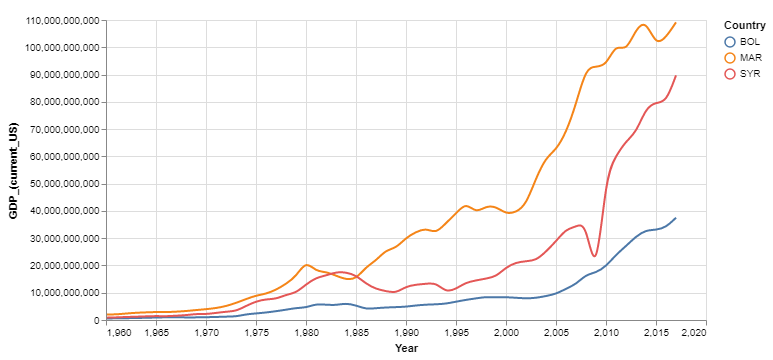

In [360]:
nearest = alt.selection(type='single', nearest=True, on='mouseover', fields=["Year"], empty='none')

line = alt.Chart().mark_line(interpolate='basis').encode(
    x="Year",
    y="GDP_(current_US)", 
    color="Country"
)

selectors = alt.Chart().mark_point().encode(x="Year", opacity=alt.value(0)).add_selection(nearest)

points = line.mark_point().encode(opacity=alt.condition(nearest, alt.value(1), alt.value(0)))

text = line.mark_text(align='left', dx=5, dy=-5).encode(text=alt.condition(nearest, "GDP_(current_US)", alt.value(' ')))


rules = alt.Chart().mark_rule(color='gray').encode(x="Year").transform_filter(nearest)


alt.layer(line, selectors, points, rules, text, data=df, width=600, height=300)

Now that we have been able to put some extra data fo our data frames let's simply get to our main objective, that was "predict" the situation for Syria in those years after the begin of the conflict, but otherwise.

## How are we going to do it?

As we saw in the first Notebook of Data_treatment, and inside a frame with thousands of economical or cultural pecualirities that make the difference between these and all the countries in the world, Bolivia's and Morocco's evolution, development and situation at the moment when the conflict start are similar to Syria.

In [387]:
df_syria.at[2014,"GDP_(current_US)"]

77827361315.99854

In [419]:
df['const'] = 1

In [435]:
reg_TOTAL = sm.OLS(endog=df['GDP_(current_US)'], 
                     exog=df[['const', 'CO2_emissions_(kt)', "Urban_population", "Mobile_cellular_subscriptions", "Year"]],
                     missing='drop')

In [426]:
results_reg_TOTAL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       GDP_(current_US)   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     343.7
Date:                Sun, 18 Nov 2018   Prob (F-statistic):           4.49e-68
Time:                        17:28:59   Log-Likelihood:                -3275.8
No. Observations:                 135   AIC:                             6562.
Df Residuals:                     130   BIC:                             6576.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -2.668e+11   1.51e+11     -1.768      0.079   -5.65e+11    3.17e+10
CO2_emissions_(kt)             1.516e+05   6.23e+04      2.435      0.016    2.84e+04    2.75e+05
Urban_population               2107.5071    255.161      8.260      0.000    1602.701    2612.313
Mobile_cellular_subscriptions  1418.6927    109.894     12.910      0.000    1201.281    1636.105
Year                           1.328e+08   7.62e+07      1.744      0.083   -1.78e+07    2.84e+08
==============================================================================
Omnibus:                       56.351   Durbin-Watson:                   0.353
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.268
Skew:                           1.332   Prob(JB):                     3.12e-67
Kurtosis:                       9.881   Cond. No.                     2.87e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [422]:
results_reg_TOTAL = reg_TOTAL.fit()

In [431]:
results_reg_TOTAL.predict(exog=[1, df_syria.at[2014,"CO2_emissions_(kt)"],
                              df_syria.at[2014,"Urban_population"], 
                              df_syria.at[2014,"Mobile_cellular_subscriptions"], 
                              2014])

array([4.75967241e+10])

In [432]:
df_bm = pd.concat([df_bolivia, df_morocco])

In [433]:
df_bm['const'] = 1

In [436]:
reg_TOTAL_II = sm.OLS(endog=df_bm['GDP_(current_US)'], 
                     exog=df_bm[['const', 'CO2_emissions_(kt)', "Urban_population", "Mobile_cellular_subscriptions", "Year"]],
                     missing='drop')

In [437]:
results_reg_TOTAL_II = reg_TOTAL_II.fit()

In [438]:
results_reg_TOTAL_II.predict(exog=[1, df_syria.at[2014,"CO2_emissions_(kt)"],
                              df_syria.at[2014,"Urban_population"], 
                              df_syria.at[2014,"Mobile_cellular_subscriptions"], 
                              2014])

array([6.0112169e+10])